## Deep Dive into Seaborn

### Overview:

 - Seaborn is a popular data visualization library for Python
 - It is a combination of aesthetic appeal, technical insights and ease of use. 
 - Sample sns plots, graphs and customization tools available through seaborn




## Introduction

Seaborn is built based on $matplotlib$ library. It is used to create well-designed visualizatoin with nice aesthetic quality and provides meaningful insights. As a Seaborn user, you are able to customize the color so it stands out, define boundaries to see data more clearly and add different parameters to gain more insight with a messy data. 

As a data scientist, our job is to provide explanations to our stakeholders/clients. More often than not, these people rely on us and our data to make snap decisions. Having visual representation of our findings and insight coupled with our presentation will go a long way in our careers. 


Although there are other Python libraries for visualization, Seaborn is a clear favorite of mine due to ease of use and technical insight it provides.  




## fig

## Table of Contents

- Setting up the Environment
- Data Visualizatoin using Seaborn
    - Satistical Relationships
    - Plotting Categorical Data
    - Visualizaing the Distribution of a Dataset

### 1.) Setting up the Environment

The seaborn library has four mandatory dependencies it needs for it to run: 

 - Numpy
 - Scipy 
 - matplotlib
 - Pandas
 
In order to use Seaborn we need to install all the depedencies mentioned above. Once that is done, we are ready to use the Seaborn library. 

Importing dependenices and seaborn itself in your Juptyer Notebooke. Please look below for the codes:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from scipy import stats 
%matplotlib inline


We're all set to explore seaborn!

### 2.) Dataset Used for Data Visualization

We will work with a data set from kaggle. This is the api command to download the dataset from kaggle.

pip install kaggle and run the below command to a file location you want the data to be house at.

$kaggle datasets download -d jsphyg/tipping$

I've picked this dataset because they contain a good set of features in both categorical and numerical instance. This dataset is comes from kaggle and is real, this is important because it'll give us an idea of how data visualization and exploration work is done.




In [2]:
tips = pd.read_csv('../../../../data/tips.csv')
tips.head()

def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary [['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values 
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2)
    return summary


### Distribution plot 

A bar chart is a common example in visualizing the distribution of a single feature in a dataset. Each instance a data is expressed it is mapped in a 2-d grid in between a bin and the more we get the higher the bin gets. 

To initiate this we use $distplot()$ function in the Seaborn library. 

The syntax goes as follow: 

sns.distplot(tips['total_bill'])



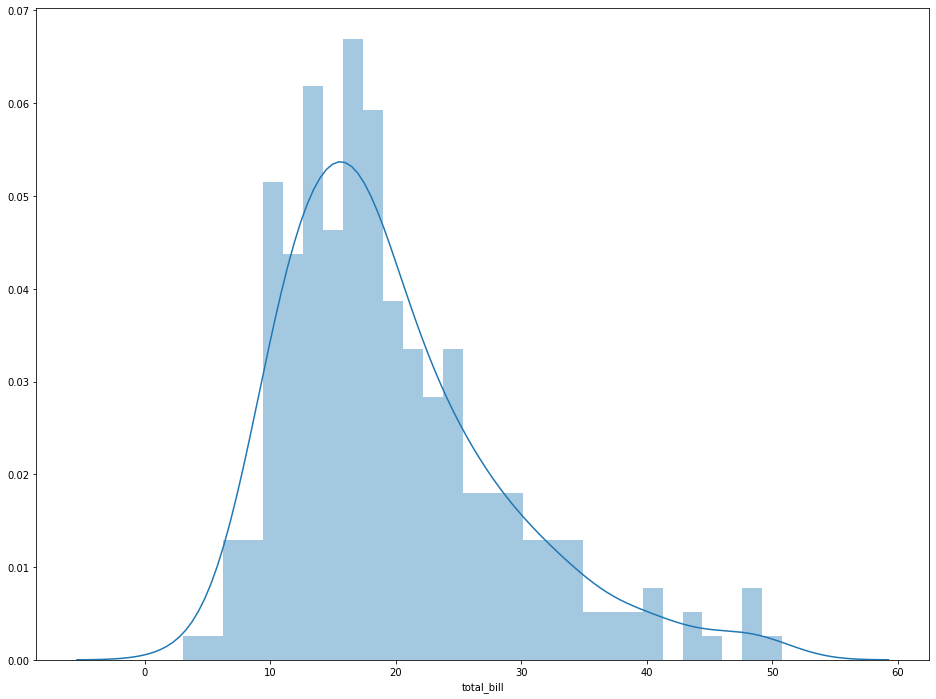

In [42]:
plt.figure(figsize=(16,12))
sns.distplot(tips['total_bill'], kde = True, bins =30)

### Joint plot

Joint plot is a useful graph that creates a visual relationship between two variables. Each point is created using the columns as a map to point point that particular data in a 2 d graph. 

The parameters we use are $x$, $y$, and $data$. These will populate the x-axis, y-axis and the data we are using. In this example we will explore the relationship between bill amount and tips. 

Based on expirence, we should expect a positive corrolation between tip and bill amount.

we can use the following to change the kind of plots we're using. 

$sns.jointplot(x="total_bill", y="tip", data=tips, kind = ('reg','hex''kde')$

reg = regression line through a scatter plot.
hex = instead of a plot it'll use hexagon with darker color to indicate frequency
kde = shows density of the plots 

In our example, we will use $reg$ as kind and it'll create a scatterplot with a regression line on top of it.

<Figure size 1152x864 with 0 Axes>

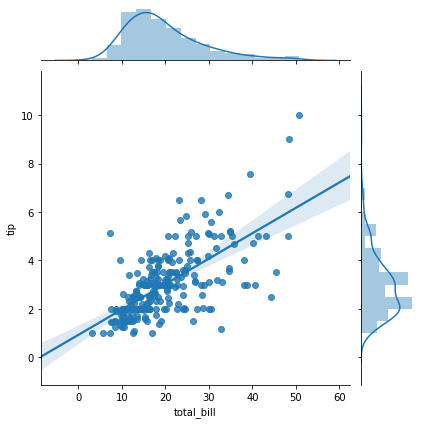

In [43]:
plt.figure(figsize=(16,12))
sns.jointplot(x="total_bill", y="tip", data=tips, kind = 'reg')

### Piar Plots

This is a useful tool that analyze all numerical relationship within the dataframe. It also supports a colored hue for categorical columns. When we pass in these command, Seaborn will create multiple graphs as seen below. We can further stylize this to give us a better visual through the use of $hue$ argument as shown below:

$hue$ = takes in the categorical columns and further distinguish our data. In our case, we'll add column labeled 'sex'.
 
As seen below, it compares the three numerical features we have in our data set ($total_bill$, $tip$, $size$). 


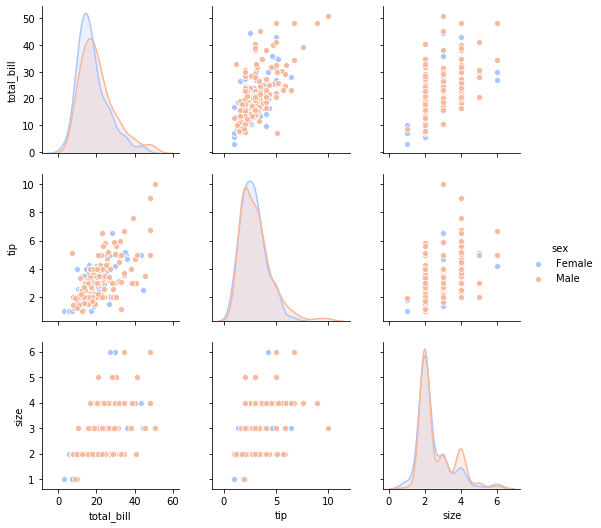

In [44]:
sns.pairplot(tips, hue='sex', palette = 'coolwarm')

### Bar plot 

Is a genearl plot that allows you to aggregate the categorical data based off some function; the defualt is the mean. 

function is $sns.barplot(x='sex ',y='total_bill ',data=tips, estimator='statistical function ')$

Note - we can add more statistical funciton to the $estimator$ in sns.barplot. 

By default it is calculating the mean, but we can create our own statistical funciton within the $estimator$ bin. 

Here the categorical column is "sex." Based on the graph below, the average bill for males is slightly higher than the average bll for females. 

#### Count plot

Is essentially the same as a barplot, but the y-axis is already chosen for you. 


$sns.countplot(x='sex',data=tips)$

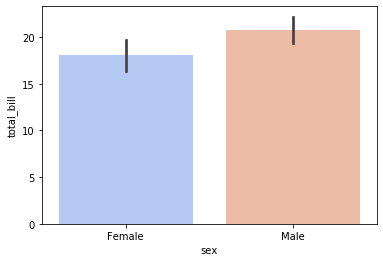

In [45]:
sns.barplot(x='sex',y='total_bill',data=tips, palette='coolwarm')

### Box and Violent plot

Both these pots are used to show the distribution of categorical data. 
A box plot is AKA box and whisker plot. The graph shows the distribution of quantitative data in a way that hopefullyi facilitates comparisons between variables.

$sns.boxplot(x='day',y='total_bill',data=tips)$

To make it more interesting we will add $hue='smoker'$ and it will look like: 
$sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker')$

Now we have a graph that splits our data by day and smoker status. We're able to see the behavior of the column 'total_bill' in terms of 'days' and 'smoker' features.


#### This is where the power of Seaborn shines. We're able to quickly add parameters to our graphs quickly and smoothly. 

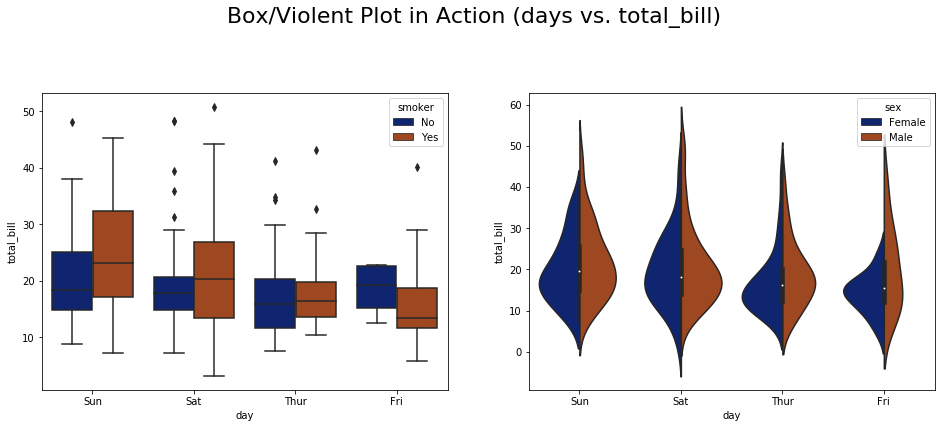

In [54]:
plt.figure(figsize=(16,12))
plt.suptitle('Box/Violent Plot in Action (days vs. total_bill)', fontsize =22)

plt.subplot(221)
sns.boxplot(x='day',y='total_bill',data=tips, hue='smoker', palette='dark')

plt.subplot(222)
sns.violinplot(x='day',y='total_bill',data=tips, hue='sex', split=True, palette='dark')

### Strip plot & Swarm plot

Is a scatterplot where one variable is categorical. 

Example: 
$sns.stripplot(x='day', y='total_bill', data=tips, jitter= True)$

$jitter$ adds random noise to separate some of the stacked points. This enables us to see the thicker points and provides us a clearer version of a strip plot.

Similar above, we will add $hue$ and $split(aka- dodge)$ arguments to get a better feel of our data.



#### Swarm plot 
Is very similar to a strip plot, but the points do not overlap. This gives a better representation of the distribution of values. A good way to think about it is a combination of both scatter and violent plots.

The drawbacks of a swarm plot is if the data is too big, the points might go too wide and it also takes a lot of computation to begin to arrange them. So it might be wise to use the swarm plot only on managable datasets. 


Text(0.5, 1.0, 'Swarmplot')

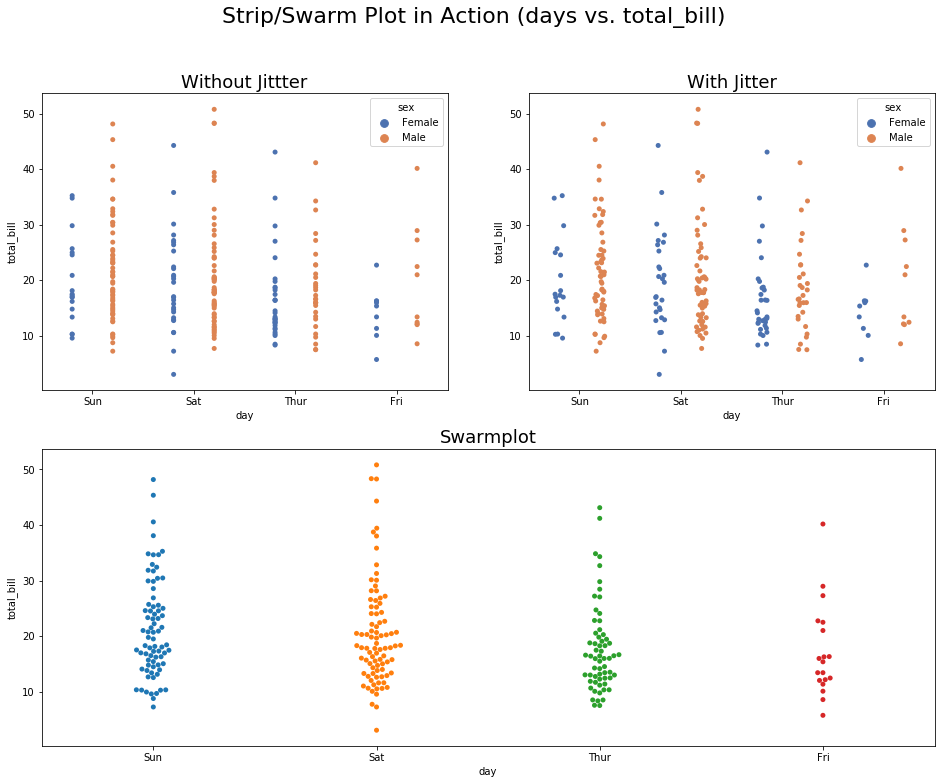

In [53]:
plt.figure(figsize=(16,12))
plt.suptitle('Strip/Swarm Plot in Action (days vs. total_bill)', fontsize =22)

plt.subplot(221)
g = sns.stripplot(x='day', y='total_bill', data=tips, jitter= False, palette='deep', hue='sex', dodge=True)
g.set_title('Without Jittter', fontsize=18)

plt.subplot(222)
g1 = sns.stripplot(x='day', y='total_bill', data=tips, jitter= True, palette='deep',hue='sex', dodge=True)
g1.set_title('With Jitter', fontsize=18)


plt.subplot(212)
g2 = sns.swarmplot(x='day', y='total_bill', data=tips)
g2.set_title('Swarmplot',fontsize=18)